In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn import datasets
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
digits = datasets.load_digits() # 手写数字数据集
X = digits.data
y = copy.deepcopy(digits.target)
y[digits.target==9] = 1
y[digits.target!=9] = 0 # 使数据类别不平衡(使其变为二分类问题)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression(solver='sag', max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
decision_scores = log_reg.decision_function(X_test) # 计算样本到分离超平面的有符号距离
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
auc = roc_auc_score(y_test, decision_scores) # 计算AUC(二分类)
auc

0.9829903978052126

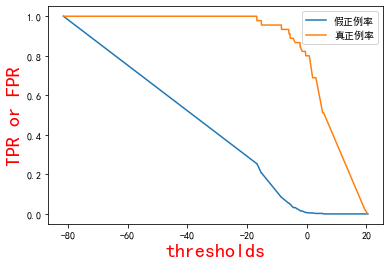

In [10]:
plt.plot(thresholds, fprs, label='假正例率')
plt.plot(thresholds, tprs, label='真正例率')
plt.xlabel('thresholds', color='red', size=20)
plt.ylabel('TPR or FPR', color='red', size=20)
plt.legend()
plt.show()

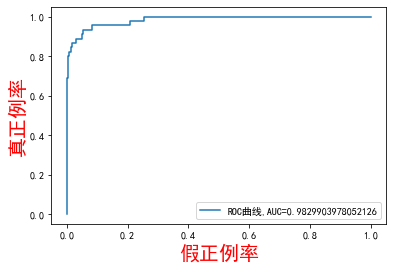

In [11]:
# 手工绘制ROC曲线
plt.plot(fprs, tprs, label='ROC曲线,AUC={}'.format(str(auc))) # 绘制ROC曲线(仅二分类)
plt.legend()
plt.xlabel('假正例率', color='red', size=20)
plt.ylabel('真正例率', color='red', size=20)
plt.show()

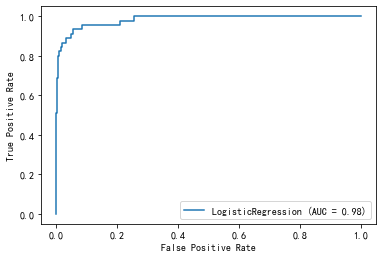

In [12]:
# sklearn包绘制
plot_roc_curve(log_reg, X_test, y_test)